In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

ĐỌC DỮ LIỆU TỪ FILE CSV

In [2]:
Data_inland = pd.read_csv('Datasets/housing_inland.csv')
Data_near_ocean = pd.read_csv('Datasets/housing_near_ocean.csv')

VẤN ĐỀ 03: 

- Xây dựng khoảng tin cậy cho $P$ 

- Kiểm định giả thuyết:

    + Với giá nhà: kiểm định rằng " Tỷ lệ giá nhà > 310000$ là 50%" 
    + Với thu nhập: kiểm định rằng " Tỷ lệ thu nhập > 3000$ là 60%"

Đầu tiên ta sẽ xây dựng khoảng tin cậy cho $P$

Ở đây, tôi sẽ xây dựng khoảng tin cậy 95%

-> $\alpha$ = 0.05 -> $Z_{\alpha/2}$ $\approx$ $1.95996$

In [3]:
CI_level = 0.95
alpha = 1 - CI_level
Z_alpha2 = norm.ppf(1-alpha/2,0,1)

Tiếp theo ta sẽ tính:
+ $\hat{P}$ của giá nhà lớn hơn 310000 của những căn nhà trong đất liền
+ $\hat{P}$ của thu nhập lớn hơn 3000 của những chủ nhà trong đất liền

In [4]:
x=Data_inland[Data_inland['median_house_value']>310000].shape[0]
n=Data_inland['median_house_value'].shape[0]

p_hat_house_value = x/n

In [5]:
x=Data_inland[Data_inland['median_income']*1000>3000].shape[0]
n=Data_inland['median_income'].shape[0]

p_hat_income = x/n

In [6]:
SE_house_value = math.sqrt((p_hat_house_value * (1-p_hat_house_value))/n)

lower_inland_house_value_CI = p_hat_house_value - Z_alpha2*SE_house_value
upper_inland_house_value_CI = p_hat_house_value + Z_alpha2*SE_house_value

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_inland_house_value_CI:.3f},{upper_inland_house_value_CI:.3f})")

Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.024,0.032)


In [7]:
SE_income = math.sqrt((p_hat_income * (1-p_hat_income))/n)

lower_inland_income_CI = p_hat_income - Z_alpha2*SE_income
upper_inland_income_CI = p_hat_income + Z_alpha2*SE_income

print(f"Khoảng tin cậy cho xác suất cho thu nhập > 3000$ là ({lower_inland_income_CI:.3f},{upper_inland_income_CI:.3f})")

Khoảng tin cậy cho xác suất cho thu nhập > 3000$ là (0.483,0.507)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

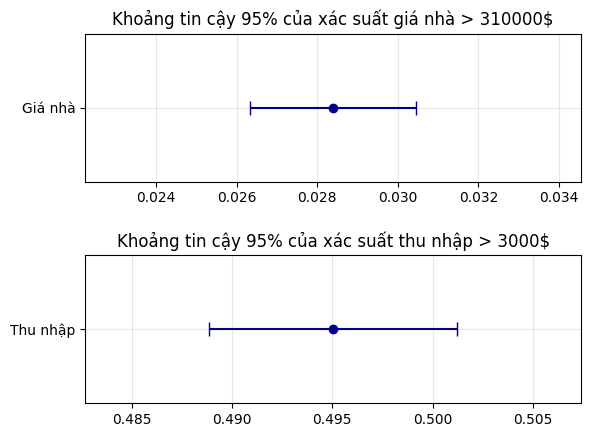

In [8]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[p_hat_house_value],
             xerr=[SE_house_value],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của xác suất giá nhà > 310000$')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[p_hat_income],
             xerr=[SE_income],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

Tiếp theo ta sẽ tính:
+ $\hat{P}$ của giá nhà lớn hơn 310000 của những căn nhà ven biển
+ $\hat{P}$ của thu nhập hơn 3000 của những chủ nhà ven biển


In [9]:
x=Data_near_ocean[Data_near_ocean['median_house_value']>310000].shape[0]
n=Data_near_ocean['median_house_value'].shape[0]

p_hat_house_value = x/n

In [10]:
x=Data_near_ocean[Data_near_ocean['median_income']*1000>3000].shape[0]
n=Data_near_ocean['median_income'].shape[0]

p_hat_income = x/n

In [11]:
SE_house_value = math.sqrt((p_hat_house_value * (1-p_hat_house_value))/n)

lower_nearocean_house_value_CI = p_hat_house_value - Z_alpha2*SE_house_value
upper_nearocean_house_value_CI = p_hat_house_value + Z_alpha2*SE_house_value

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_nearocean_house_value_CI:.3f},{upper_nearocean_house_value_CI:.3f})")


Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.255,0.289)


In [12]:
SE_income = math.sqrt((p_hat_income * (1-p_hat_income))/n)

lower_nearocean_income_CI = p_hat_income - Z_alpha2*SE_income
upper_nearocean_income_CI = p_hat_income + Z_alpha2*SE_income

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_nearocean_income_CI:.3f},{upper_nearocean_income_CI:.3f})")


Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.650,0.686)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

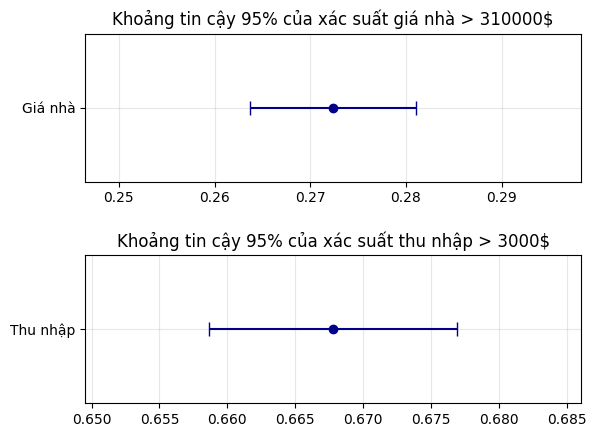

In [13]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[p_hat_house_value],
             xerr=[SE_house_value],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của xác suất giá nhà > 310000$')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[p_hat_income],
             xerr=[SE_income],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

Bây giờ chúng ta sẽ kiểm định giả thuyết:

+ Với giá nhà: kiểm định rằng " Tỷ lệ giá nhà > 310000$ là 50%" 
+ Với thu nhập: kiểm định rằng " Tỷ lệ thu nhập > 3000$ là 60%"

Đầu tiên ta sẽ kiểm định giả thuyết giá nhà trước

$H_0:\ p = $ 50% 

$H_1:\ p \neq $ 50%  

Với $\alpha = 0.05 $

In [29]:
p0 = 0.5
alpha = 0.05
Z_alpha2 = norm.ppf(1-(alpha))

Chúng ta sẽ kiểm tra với nhà trên đất liền trước

In [30]:
x=Data_inland[Data_inland['median_house_value']>310000].shape[0]
n=Data_inland['median_house_value'].shape[0]

p_hat_inland_house_value = x/n

In [31]:
SE_inland_house_value = math.sqrt((p0*(1-p0))/n)
Z_inland_house_value = (p_hat_inland_house_value - p0)/SE_inland_house_value

In [32]:
p_value = (1-norm.cdf(Z_inland_house_value))
if p_value < alpha: print("Bác bỏ giả thuyết H0")
else: print("Không bác bỏ H0")

if Z_inland_house_value > Z_alpha2: print("Ủng hộ H1")
else: print("Không ủng hộ H1")

Không bác bỏ H0
Không ủng hộ H1


Tiếp theo ta sẽ kiểm tra giả thuyết với những căn nhà ven biển

In [33]:
x=Data_near_ocean[Data_near_ocean['median_house_value']>310000].shape[0]
n=Data_near_ocean['median_house_value'].shape[0]

p_hat_nearocean_house_value = x/n

In [34]:
SE_nearocean_house_value = math.sqrt((p0*(1-p0))/n)
Z_nearocean_house_value = (p_hat_nearocean_house_value - p0)/SE_nearocean_house_value

In [35]:
p_value = 1-norm.cdf(Z_nearocean_house_value)

if p_value < alpha: print("Bác bỏ giả thuyết H0")
else: print("Không bác bỏ H0")

if Z_inland_house_value > Z_alpha2: print("Ủng hộ H1")
else: print("Không ủng hộ H1")

Không bác bỏ H0
Không ủng hộ H1


Trực quan hóa dữ liệu

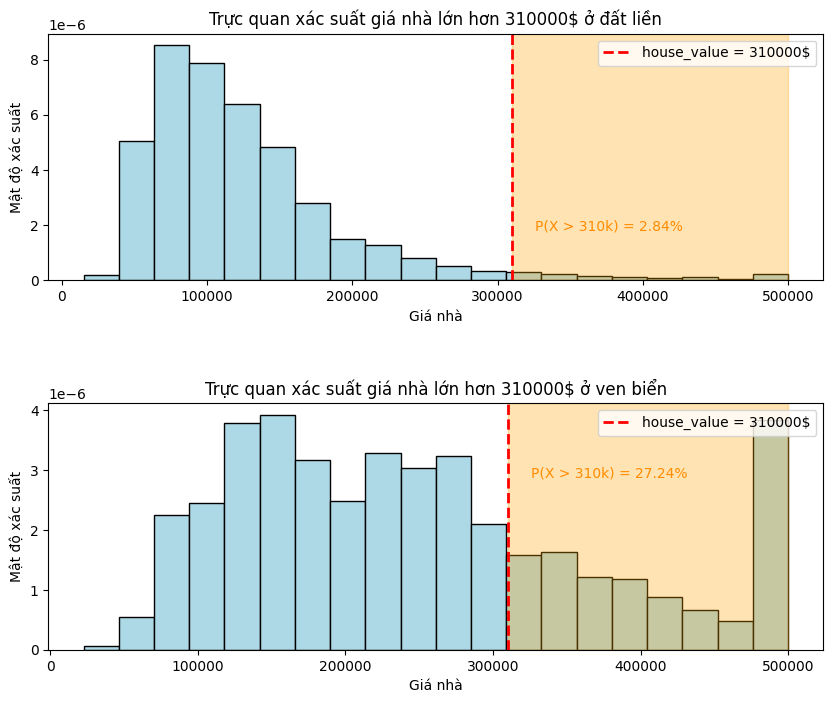

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].hist(Data_inland['median_house_value'], bins=20, color='lightblue', edgecolor='black', density=True)
ax[0].axvspan(310000,Data_inland['median_house_value'].max(),color='orange',alpha=0.3)
ax[0].axvline(310000, color='red', linestyle='--', linewidth=2, label=f"house_value = {310000}$")
ax[0].set_xlabel("Giá nhà")
ax[0].set_ylabel("Mật độ xác suất")
ax[0].text(310000*1.05, ax[0].set_ylim()[1]*0.2, f"P(X > 310k) = {p_hat_inland_house_value:.2%}", color='darkorange', fontsize=10)
ax[0].set_title('Trực quan xác suất giá nhà lớn hơn 310000$ ở đất liền')
ax[0].legend()

plt.subplots_adjust(hspace=0.5)

ax[1].hist(Data_near_ocean['median_house_value'], bins=20, color='lightblue', edgecolor='black', density=True)
ax[1].axvspan(310000,Data_near_ocean['median_house_value'].max(),color='orange',alpha=0.3)
ax[1].axvline(310000, color='red', linestyle='--', linewidth=2, label=f"house_value = {310000}$")
ax[1].set_xlabel("Giá nhà")
ax[1].set_ylabel("Mật độ xác suất")
ax[1].text(310000*1.05, ax[1].set_ylim()[1]*0.7, f"P(X > 310k) = {p_hat_nearocean_house_value:.2%}", color='darkorange', fontsize=10)
ax[1].set_title('Trực quan xác suất giá nhà lớn hơn 310000$ ở ven biển')
ax[1].legend()


Tiếp theo ta sẽ kiểm định giả thuyết về thu nhập

$H_0:\ p = $ 60% 

$H_1:\ p > $ 60%  

Với $\alpha = 0.05 $

In [37]:
p0 = 0.5
alpha = 0.05
Z_alpha2 = norm.ppf(1-(alpha/2))

Chúng ta sẽ kiểm tra với thu nhập của chủ nhà trên đất liền trước

In [38]:
x=Data_inland[Data_inland['median_income']*1000>3000].shape[0]
n=Data_inland['median_income'].shape[0]

p_hat_inland_income = x/n

In [39]:
SE_inland_income = math.sqrt((p0*(1-p0))/n)
Z_inland_income = (p_hat_inland_income - p0)/SE_inland_income

In [40]:
p_value = 1-norm.cdf(Z_inland_income)
if p_value < alpha: print("Bác bỏ giả thuyết H0")
else: print("Không bác bỏ H0")

if Z_inland_house_value > Z_alpha2: print("Ủng hộ H1")
else: print("Không ủng hộ H1")

Không bác bỏ H0
Không ủng hộ H1


Tiếp theo ta sẽ kiểm tra giả thuyết với những chủ căn nhà ven biển

In [41]:
x=Data_near_ocean[Data_near_ocean['median_income']*1000>3000].shape[0]
n=Data_near_ocean['median_income'].shape[0]

p_hat_nearocean_income= x/n

In [43]:
SE_nearocean_income = math.sqrt((p0*(1-p0))/n)
Z_nearocean_income= (p_hat_nearocean_income - p0)/SE_nearocean_income

In [44]:
p_value = 1-norm.cdf(Z_nearocean_income)
if p_value < alpha: print("Bác bỏ giả thuyết H0")
else: print("Không bác bỏ H0")
if Z_inland_house_value > Z_alpha2: print("Ủng hộ H1")
else: print("Không ủng hộ H1")

Bác bỏ giả thuyết H0
Không ủng hộ H1


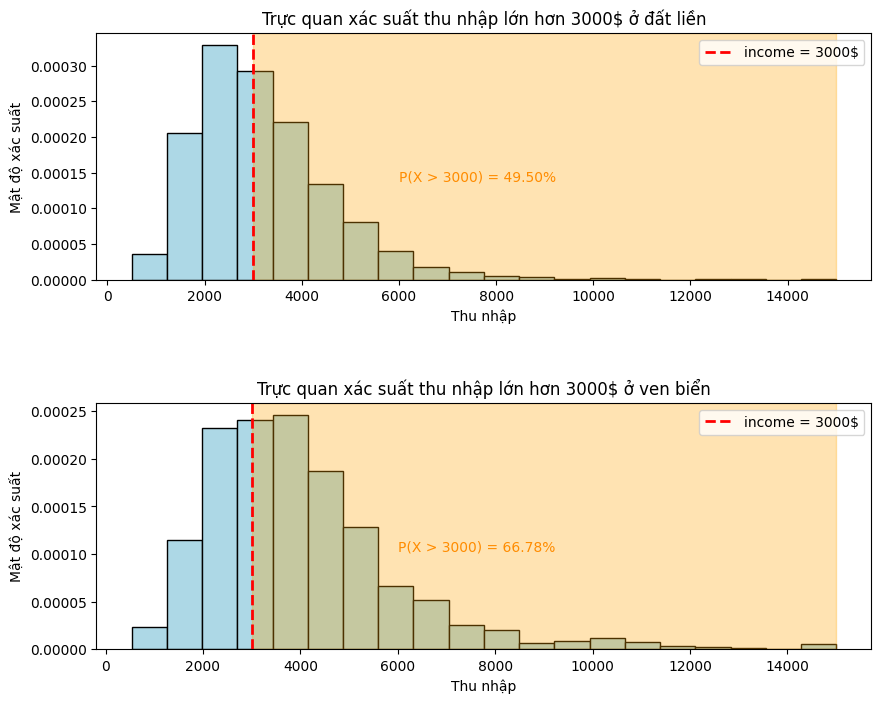

In [49]:
fig,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].hist(Data_inland['median_income']*1000, bins=20, color='lightblue', edgecolor='black', density=True)
ax[0].axvspan(3000,Data_inland['median_income'].max()*1000,color='orange',alpha=0.3)
ax[0].axvline(3000, color='red', linestyle='--', linewidth=2, label=f"income = {3000}$")
ax[0].set_xlabel("Thu nhập")
ax[0].set_ylabel("Mật độ xác suất")
ax[0].text(3000*2, ax[0].set_ylim()[1]*0.4, f"P(X > 3000) = {p_hat_inland_income:.2%}", color='darkorange', fontsize=10)
ax[0].set_title('Trực quan xác suất thu nhập lớn hơn 3000$ ở đất liền')
ax[0].legend()

plt.subplots_adjust(hspace=0.5)

ax[1].hist(Data_near_ocean['median_income']*1000, bins=20, color='lightblue', edgecolor='black', density=True)
ax[1].axvspan(3000,Data_near_ocean['median_income'].max()*1000,color='orange',alpha=0.3)
ax[1].axvline(3000, color='red', linestyle='--', linewidth=2, label=f"income = {3000}$")
ax[1].set_xlabel("Thu nhập")
ax[1].set_ylabel("Mật độ xác suất")
ax[1].text(3000*2, ax[1].set_ylim()[1]*0.4, f"P(X > 3000) = {p_hat_nearocean_income:.2%}", color='darkorange', fontsize=10)
ax[1].set_title('Trực quan xác suất thu nhập lớn hơn 3000$ ở ven biển')
ax[1].legend()
